In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
# Load the dataset
df = pd.read_csv('data.csv')
df = pd.read_csv("data/data2.csv")
df = pd.read_csv("data/data_by_artist2.csv")
df = pd.read_csv("data/data_by_genres2.csv")
df = pd.read_csv("data/data_by_year2.csv")
df = pd.read_csv("data/data_w_genres2.csv")

## Explore Dataset 

In [9]:
# View dataset 
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [11]:
# Get summary statistics 
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [13]:
# Get types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64


## Set up for training and testing

In [15]:
# Split into a training and a testing 
train, test = train_test_split(df, test_size = 0.15)

In [16]:
# View the split
print("Training Data Size: {}; Test Data Size: {}".format(len(train), len(test)))

Training Data Size: 1714; Test Data Size: 303


## Visualize 

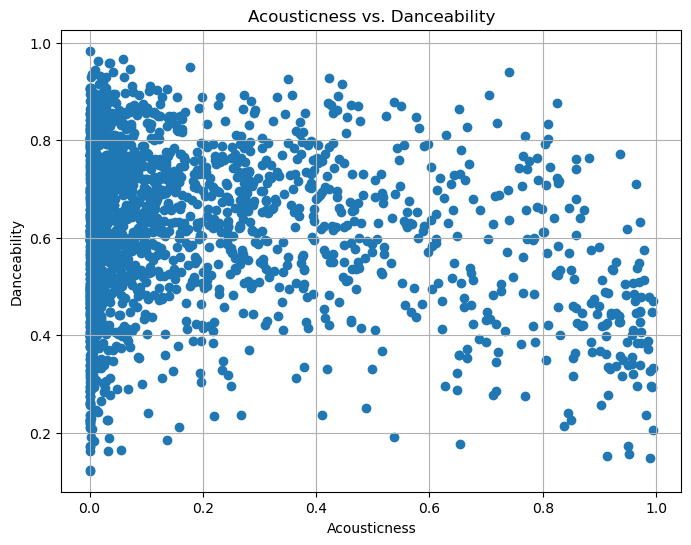

In [17]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness'], df['danceability'])
plt.title('Acousticness vs. Danceability')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

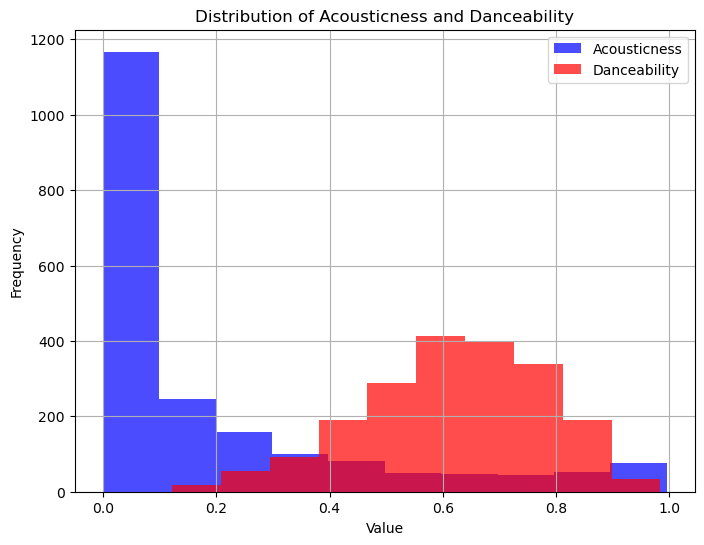

In [19]:
# Histogram 
plt.figure(figsize=(8, 6))
plt.hist(df['acousticness'], bins=10, alpha=0.7, color='blue', label='Acousticness')
plt.hist(df['danceability'], bins=10, alpha=0.7, color='red', label='Danceability')
plt.title('Distribution of Acousticness and Danceability')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

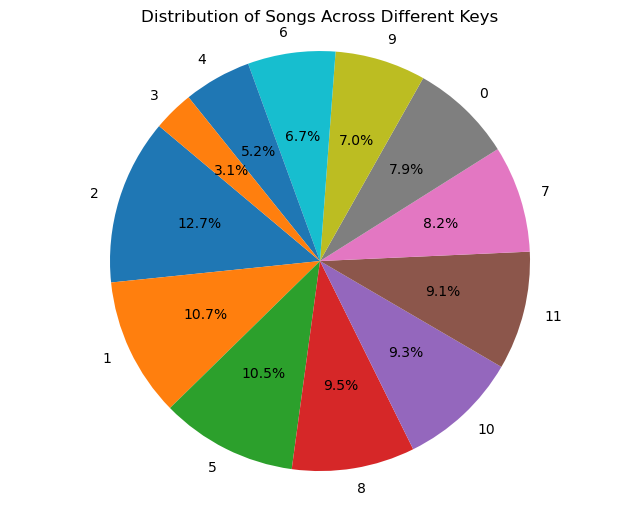

In [20]:
# Pie chart for distribution of songs across different keys
plt.figure(figsize=(8, 6))
plt.pie(df['key'].value_counts(), labels=df['key'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs Across Different Keys')
plt.axis('equal')  
plt.show()

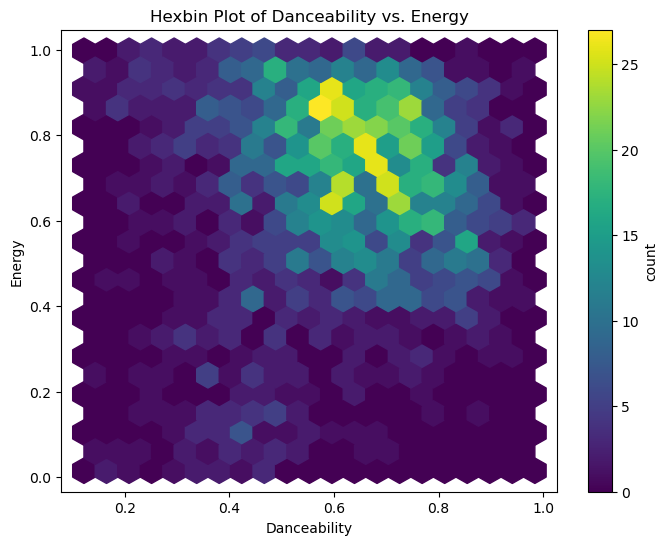

In [22]:
# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['danceability'], df['energy'], gridsize=20, cmap='viridis')
plt.colorbar(label='count')
plt.title('Hexbin Plot of Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

ValueError: could not convert string to float: 'Mask Off'

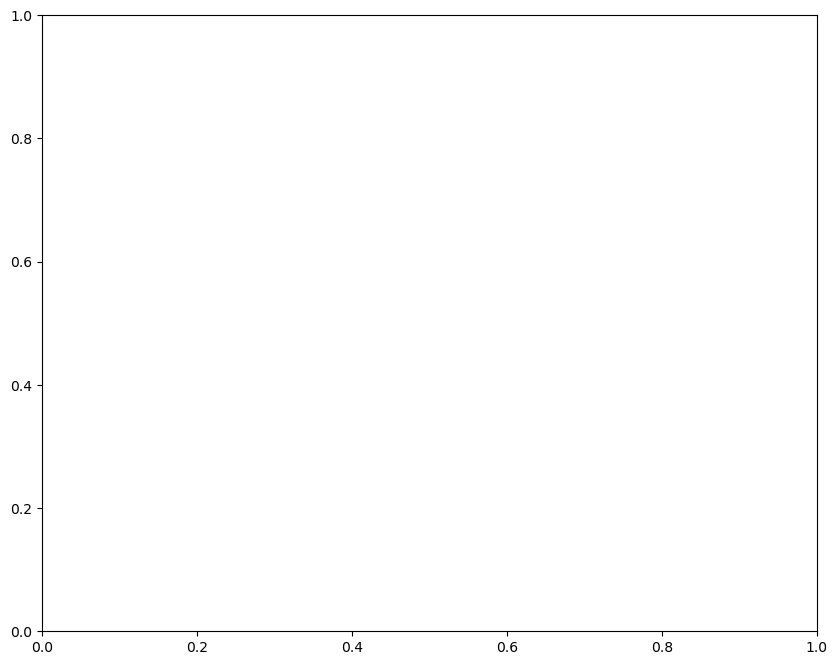

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False)
plt.show()